In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import cv2

In [96]:
#Can only try 4,5 or 6 for i

i=6
files=sorted(glob("processed_data/*21*/"+str(i)+"*/*sync*csv"))
files

['processed_data/Nov_21/6/dataset6_2023_12_11_00_18_23_sync.csv',
 'processed_data/Nov_21/6/dataset6_2023_12_11_00_18_23_sync_imu.csv']

In [97]:
df1=pd.read_csv(files[0])
df2=pd.read_csv(files[1])

In [98]:
df1.head()

,Timestamp,Pose_X,Pose_Y,Pose_Z,Sonar_Distance_1,Sonar_Distance_2,Sonar_Distance_3,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,1787038326,-1.671786e-05,-0.000022,-2.785832e-06,0.0,0.685777,2.0,-0.009703,-0.004238,0.013107
1,2525681495,3.181143e-11,0.003068,1.279609e-14,0.0,0.683220,2.0,0.007631,-0.004729,-0.004094
2,3273574352,1.863337e-11,0.002727,-1.965537e-11,0.0,0.683561,2.0,0.006347,-0.001236,-0.005332
3,4058265924,-6.999313e-05,0.002352,-1.932969e-06,0.0,0.684584,2.0,0.000246,-0.001837,-0.007012
4,4857940435,-2.898708e-05,0.000745,-2.515558e-05,0.0,0.686629,2.0,-0.005597,0.000293,-0.002352


In [99]:
df2.head()

,Timestamp,IMU_Raw_x,IMU_Raw_y,IMU_Raw_z,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,1020433664,-0.330171,-9.722486,-0.475444,-0.000255,-0.002009,0.001007
1,1042764663,-0.340670,-9.710685,-0.464109,-0.002216,-0.004220,0.002709
2,1047842741,-0.335620,-9.716748,-0.472100,-0.005143,-0.006584,0.004591
3,1060630798,-0.334004,-9.710009,-0.467616,-0.008695,-0.008220,0.006155
4,1071360111,-0.331098,-9.715729,-0.478165,-0.012285,-0.008536,0.007092


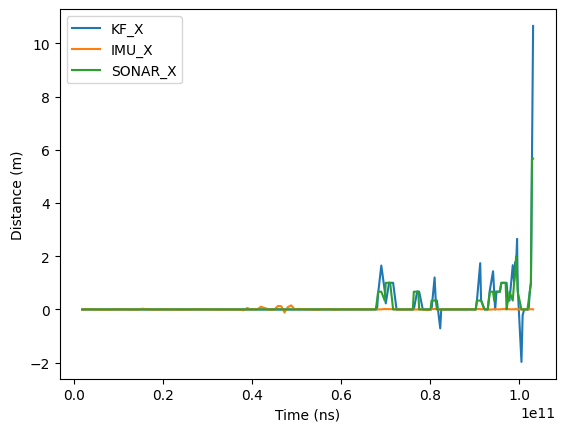

In [100]:
plt.plot(df1["Timestamp"],df1["Pose_X"]*-1)
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_X"])
plt.plot(df1["Timestamp"],df1["Sonar_Distance_1"])
plt.legend(["KF_X","IMU_X","SONAR_X"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_kf.png")

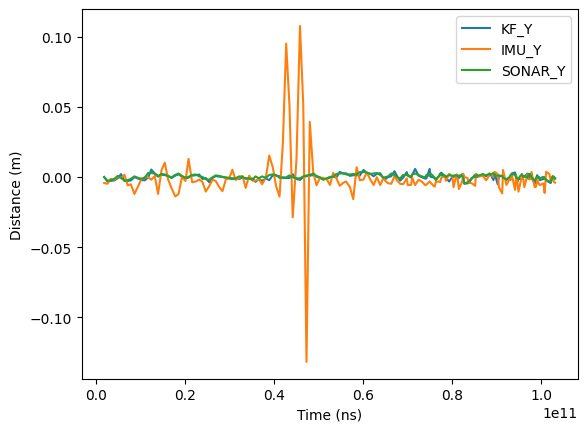

In [101]:
plt.plot(df1["Timestamp"],df1["Pose_Y"]*-1)
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_Y"])
plt.plot(df1["Timestamp"],df1["Sonar_Distance_2"]-df1["Sonar_Distance_2"][0])
plt.legend(["KF_Y","IMU_Y","SONAR_Y"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_kf.png")

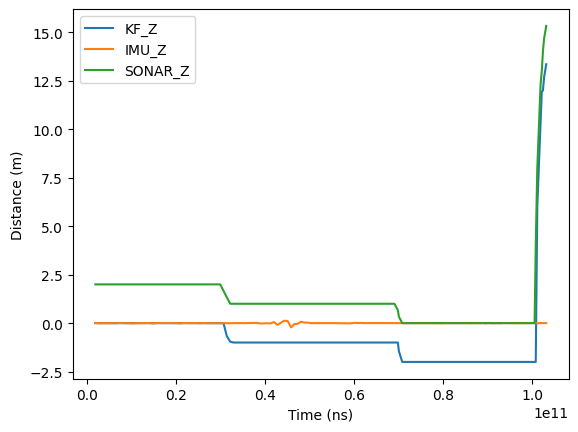

In [102]:
plt.plot(df1["Timestamp"],df1["Pose_Z"]*-1)
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_Z"])
plt.plot(df1["Timestamp"],df1["Sonar_Distance_3"])
plt.legend(["KF_Z","IMU_Z","SONAR_Z"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_kf.png")

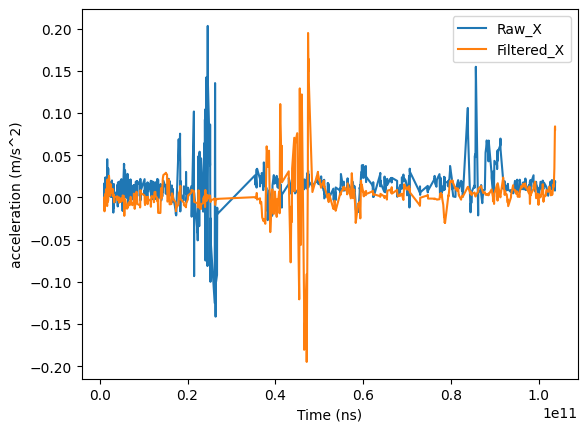

In [103]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_x"]-df2["IMU_Raw_x"][0])
plt.plot(df2["Timestamp"],df2["IMU_Linear_Acc_X"])
plt.legend(["Raw_X","Filtered_X"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_bw.png")

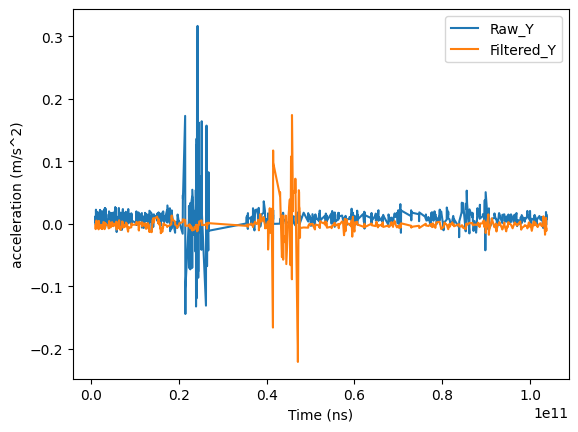

In [104]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_y"]-df2["IMU_Raw_y"][0])
plt.plot(df2["Timestamp"],df2["IMU_Linear_Acc_Y"])
plt.legend(["Raw_Y","Filtered_Y"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_bw.png")

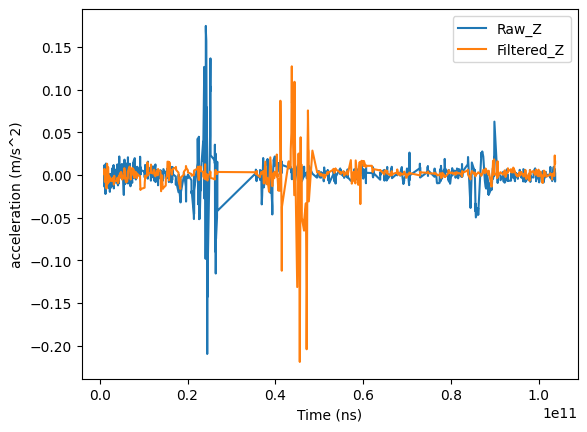

In [105]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_z"]-df2["IMU_Raw_z"][0])
plt.plot(df2["Timestamp"],df2["IMU_Linear_Acc_Z"])
plt.legend(["Raw_Z","Filtered_Z"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_bw.png")